### **Import the dataset**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data_path = "Data/diabetes.csv"
data=pd.read_csv(data_path)
diabetes_df=pd.DataFrame(data)
diabetes_df

,id,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,frame,bp.1s,bp.1d,bp.2s,bp.2d,waist,hip,time.ppn
0,1000,203.0,82,56.0,3.6,4.310000,Buckingham,46,female,62.0,121.0,medium,118.0,59.0,NaN,NaN,29.0,38.0,720.0
1,1001,165.0,97,24.0,6.9,4.440000,Buckingham,29,female,64.0,218.0,large,112.0,68.0,NaN,NaN,46.0,48.0,360.0
2,1002,228.0,92,37.0,6.2,4.640000,Buckingham,58,female,61.0,256.0,large,190.0,92.0,185.0,92.0,49.0,57.0,180.0
3,1003,78.0,93,12.0,6.5,4.630000,Buckingham,67,male,67.0,119.0,large,110.0,50.0,NaN,NaN,33.0,38.0,480.0
4,1005,249.0,90,28.0,8.9,7.720000,Buckingham,64,male,68.0,183.0,medium,138.0,80.0,NaN,NaN,44.0,41.0,300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,41506,296.0,369,46.0,6.4,16.110001,Louisa,53,male,69.0,173.0,medium,138.0,94.0,130.0,94.0,35.0,39.0,210.0
399,41507,284.0,89,54.0,5.3,4.390000,Louisa,51,female,63.0,154.0,medium,140.0,100.0,146.0,102.0,32.0,43.0,180.0
400,41510,194.0,269,38.0,5.1,13.630000,Louisa,29,female,69.0,167.0,small,120.0,70.0,NaN,NaN,33.0,40.0,20.0
401,41752,199.0,76,52.0,3.8,4.490000,Louisa,41,female,63.0,197.0,medium,120.0,78.0,NaN,NaN,41.0,48.0,255.0


In [4]:
diabetes_df.shape

(403, 19)

In [3]:
#Handle the missing value of the target variable
diabetes_df=diabetes_df.dropna(subset=['glyhb'])
display(diabetes_df.shape)

(390, 19)

## <font color="cyan">**Regression Models**</font>

### <font color="yellowgreen">**Pre-Processing**</font>

#### **Spliting and Separation**

In [5]:
#separate the feature variable and the target variable
daibetes_features=diabetes_df.drop(columns=['glyhb'])
diabetes_target=diabetes_df["glyhb"]

In [6]:
#Split the dataset into train test data- to prevent data likeage
train_feature, test_feature, train_target, test_target = train_test_split(daibetes_features, diabetes_target, test_size=0.2, random_state=42)

In [7]:
#Grouping the dataset by there datatypes
num_diabetes_df=train_feature.select_dtypes(include=['number']).columns
cat_diabetes_df=train_feature.select_dtypes(include=['object']).columns

#### **Handle missing values**

##### <font color="red">**Numerical Columns**</font>

In [8]:
#Know checking the missing values for each group of dataset
display(train_feature[num_diabetes_df].isnull().sum().sort_values(ascending=False))
display(train_feature[cat_diabetes_df].isnull().sum().sort_values(ascending=False))

bp.2s       200
bp.2d       200
bp.1d         5
bp.1s         5
height        4
time.ppn      3
waist         2
hip           2
hdl           1
chol          1
ratio         1
age           0
stab.glu      0
id            0
weight        0
dtype: int64

frame       10
location     0
gender       0
dtype: int64

In [9]:
#Filling the missing values from numerical columns using median
median_values = train_feature[num_diabetes_df].median()

#fill the missing values for all dataset with numerical columns
train_feature[num_diabetes_df] = train_feature[num_diabetes_df].fillna(median_values)
test_feature[num_diabetes_df] = test_feature[num_diabetes_df].fillna(median_values)

##### <font color="red">**Categorial Columns**</font>

In [10]:
#Know the mode of the training data
mode_values = train_feature[cat_diabetes_df].mode().iloc[0]

#Filling the missing values of the train and test data with mode of train data
train_feature[cat_diabetes_df] = train_feature[cat_diabetes_df].fillna(mode_values)
test_feature[cat_diabetes_df] = test_feature[cat_diabetes_df].fillna(mode_values)

#### **Outlier Detection and handling**

##### <font color="red">**Outlier Detection**</font>

In [11]:
#calculating the interquartile range
Q1 = train_feature[num_diabetes_df].quantile(0.25)
Q3 = train_feature[num_diabetes_df].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Knowing the outlier range
outliers_train = ((train_feature[num_diabetes_df] < lower_bound) | 
                  (train_feature[num_diabetes_df] > upper_bound))

outliers_test = ((test_feature[num_diabetes_df] < lower_bound) | 
                 (test_feature[num_diabetes_df] > upper_bound))

Text(0.5, 1.02, 'Boxplots for Numerical Features (Outlier Detection)')

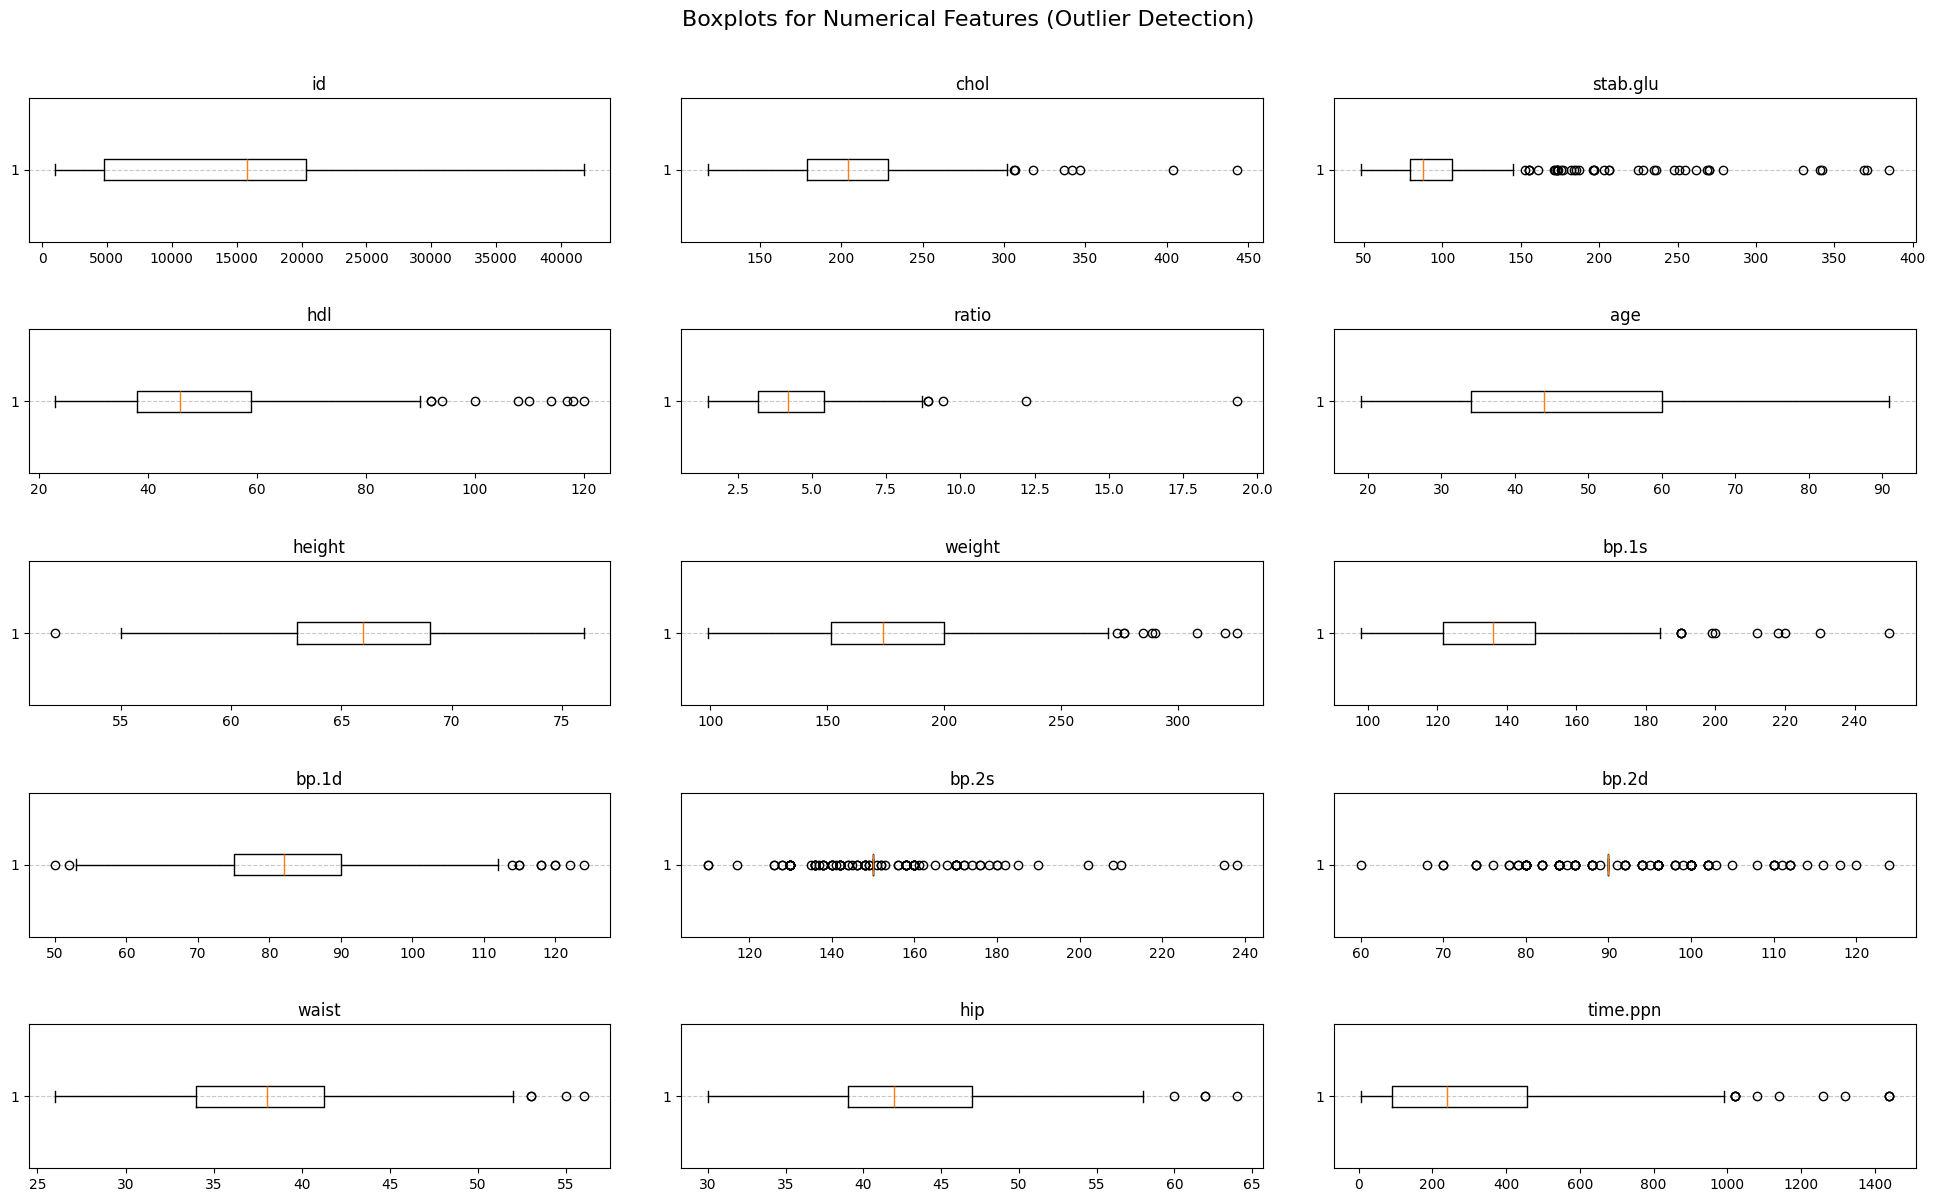

In [14]:
#Showing the outlier for the numerical data
plt.figure(figsize=(20, 12))  

for i, col in enumerate(num_diabetes_df.tolist()):
    plt.subplot(5, 3, i + 1)
    plt.boxplot(train_feature[col], vert=False) 
    plt.title(col)
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout(pad=3.0)
plt.suptitle("Boxplots for Numerical Features (Outlier Detection)", y=1.02, fontsize=16)

Us we can see from the boxplot exept some numerical columns most have outlier, to get good model we have to hahdle outlier.

##### <font color="red">**Outlier Handling**</font>

In [12]:
# for train features
for col in num_diabetes_df.tolist():
    train_feature[col] = train_feature[col].clip(    
        lower=lower_bound[col],
        upper=upper_bound[col]
    )
#for test features
for col in num_diabetes_df.tolist():
    test_feature[col] = test_feature[col].clip(
        lower=lower_bound[col],
        upper=upper_bound[col]
    )

Text(0.5, 1.02, 'Boxplots for Numerical Features (Outlier Detection)')

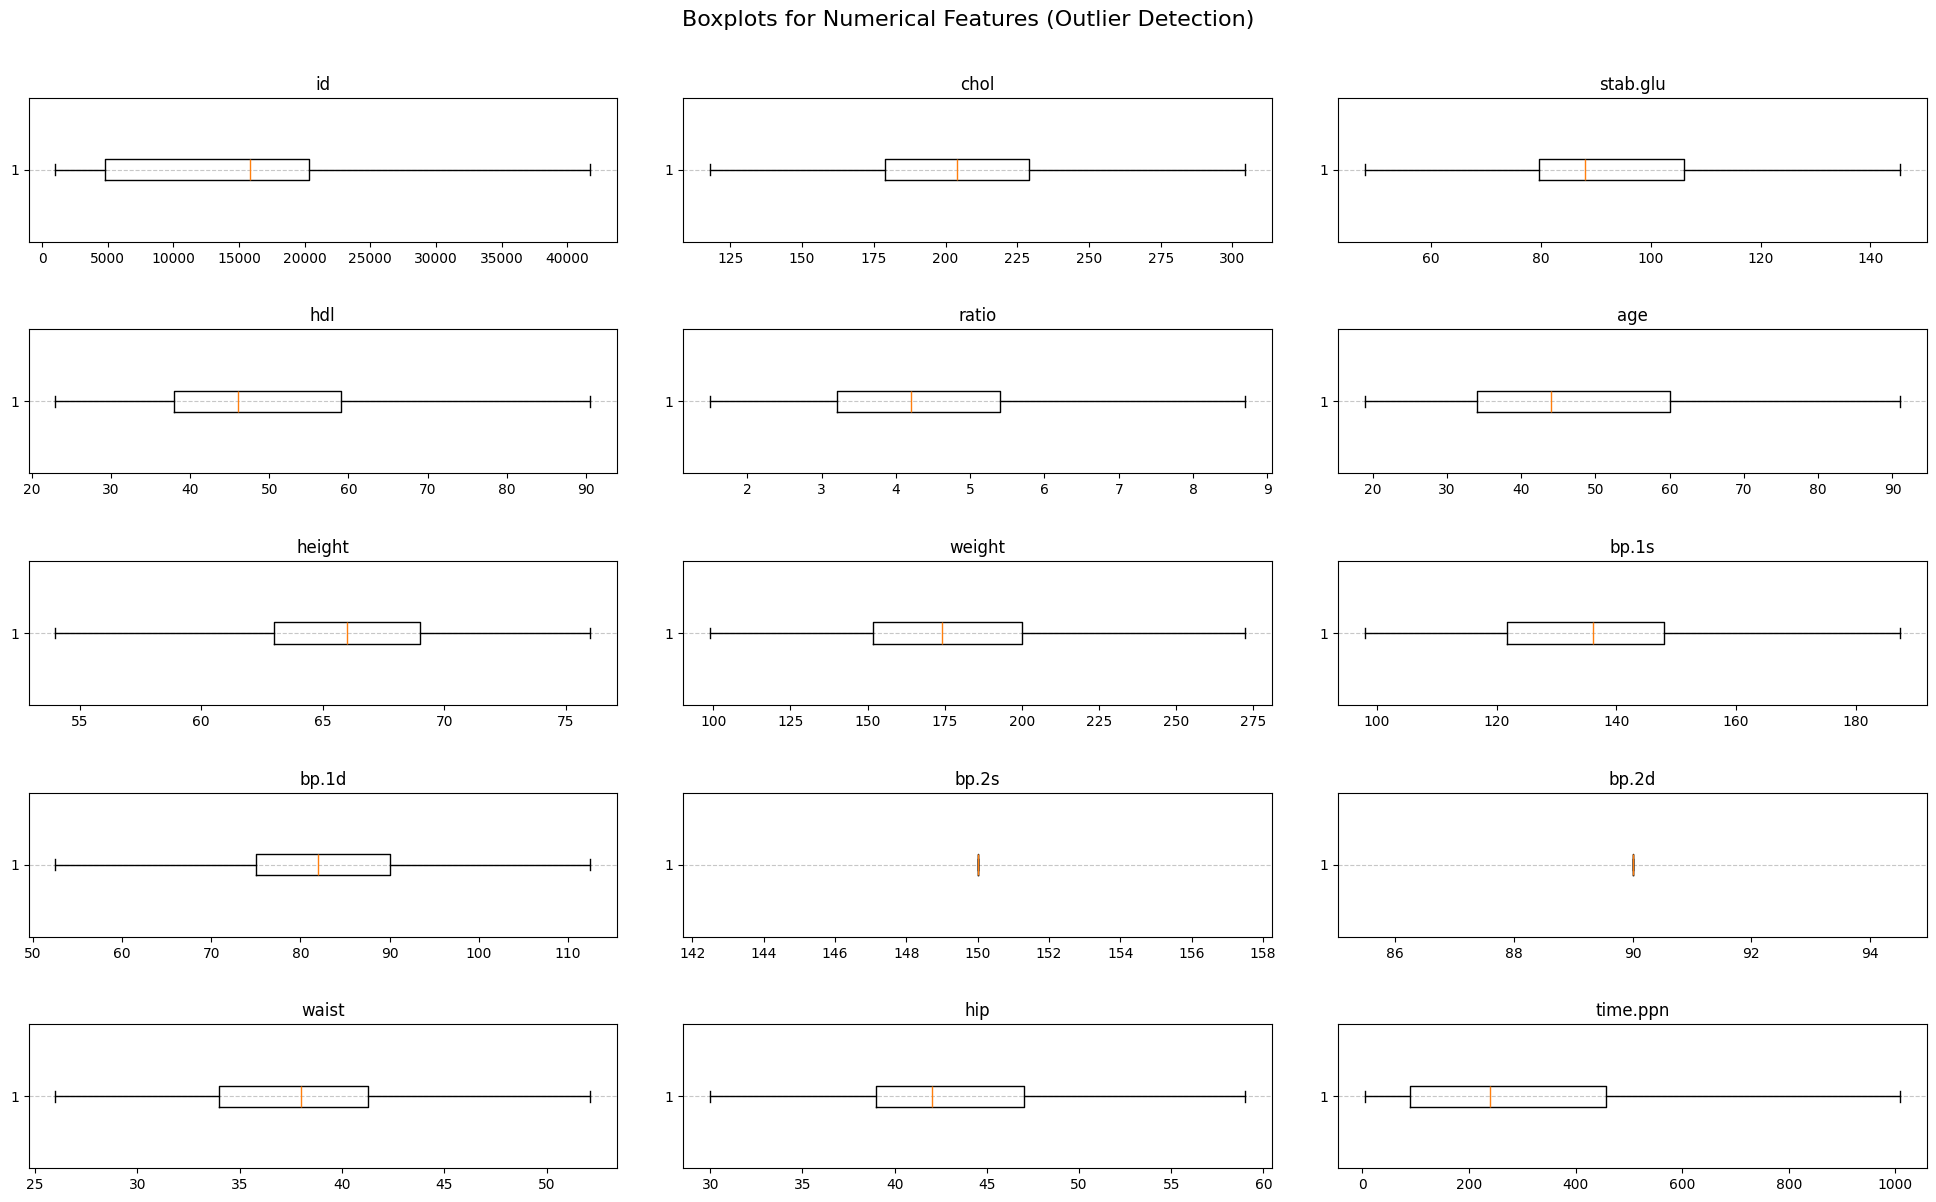

In [17]:
plt.figure(figsize=(20, 12))                      # Adjusted size for better visibility

for i, col in enumerate(num_diabetes_df.tolist()):
    plt.subplot(5, 3, i + 1)
    plt.boxplot(train_feature[col], vert=False) 
    plt.title(col)
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout(pad=3.0)
plt.suptitle("Boxplots for Numerical Features (Outlier Detection)", y=1.02, fontsize=16)

#### **Encoding Categorical Columns**

In [13]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') 
encoder.fit(train_feature[cat_diabetes_df])

train_feature_enco = encoder.transform(train_feature[cat_diabetes_df])
test_feature_enco = encoder.transform(test_feature[cat_diabetes_df])

In [14]:
train_feature_encoded = pd.concat(
    [
        train_feature.drop(columns=cat_diabetes_df).reset_index(drop=True),
        pd.DataFrame(train_feature_enco, columns=encoder.get_feature_names_out(cat_diabetes_df)).reset_index(drop=True),
    ],
    axis=1,
)

test_feature_encoded = pd.concat(
    [
        test_feature.drop(columns=cat_diabetes_df).reset_index(drop=True),
        pd.DataFrame(test_feature_enco, columns=encoder.get_feature_names_out(cat_diabetes_df)).reset_index(drop=True),
    ],
    axis=1,
)

In [19]:
display(train_feature_encoded.head())
display(test_feature_encoded.head())

,id,chol,stab.glu,hdl,ratio,age,height,weight,bp.1s,bp.1d,...,waist,hip,time.ppn,location_Buckingham,location_Louisa,gender_female,gender_male,frame_large,frame_medium,frame_small
0,20332,178.0,64.000,52.0,3.4,41,65.0,188.0,130.0,76.0,...,35.0,46.0,5.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1,2787,223.0,75.000,85.0,2.6,22,62.0,137.0,120.0,70.0,...,28.0,35.0,960.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,17776,201.0,100.000,46.0,4.4,27,65.0,145.0,121.0,75.0,...,32.0,35.0,60.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,40784,226.0,145.375,52.0,4.3,84,60.0,192.0,144.0,88.0,...,41.0,48.0,210.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,16001,222.0,82.000,87.0,2.6,51,66.0,110.0,150.0,110.0,...,28.0,37.0,270.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


,id,chol,stab.glu,hdl,ratio,age,height,weight,bp.1s,bp.1d,...,waist,hip,time.ppn,location_Buckingham,location_Louisa,gender_female,gender_male,frame_large,frame_medium,frame_small
0,1022,263.0,89.0,40.0,6.6,55,63.0,202.0,108.0,72.0,...,45.0,50.0,240.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1323,225.0,83.0,42.0,5.4,36,67.0,192.0,149.0,89.0,...,40.0,42.0,30.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2,1305,182.0,85.0,37.0,4.9,61,69.0,174.0,176.0,86.0,...,49.0,43.0,330.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,20773,203.0,71.0,78.0,2.6,45,66.0,115.0,135.0,88.0,...,30.0,34.0,15.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,20278,293.0,115.0,54.0,5.4,50,71.0,170.0,131.0,75.0,...,34.0,39.0,120.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


#### **Scaling the Feature Datas**

In [15]:
#scale the dataset using standard scaler
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()                                       #creating instance

scaled_train_feature = scaler.fit_transform(train_feature_encoded)
scaled_test_feature  = scaler.transform(test_feature_encoded)

In [16]:
#change the numpy array of scaled value to DataFrame
scaled_train_feature_df = pd.DataFrame(scaled_train_feature, columns=train_feature_encoded.columns)
scaled_test_feature_df = pd.DataFrame(scaled_test_feature, columns=test_feature_encoded.columns)

In [22]:
display(scaled_train_feature_df.head())
display(scaled_test_feature_df.head())

,id,chol,stab.glu,hdl,ratio,age,height,weight,bp.1s,bp.1d,...,waist,hip,time.ppn,location_Buckingham,location_Louisa,gender_female,gender_male,frame_large,frame_medium,frame_small
0,0.291987,-0.517413,-0.914286,0.285714,-0.363636,-0.115385,-0.166667,0.290155,-0.228571,-0.400000,...,-0.413793,0.500,-0.639456,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.837526,0.378109,-0.495238,1.857143,-0.727273,-0.846154,-0.666667,-0.766839,-0.609524,-0.800000,...,-1.379310,-0.875,1.959184,1.0,-1.0,0.0,0.0,0.0,1.0,0.0
2,0.127436,-0.059701,0.457143,0.000000,0.090909,-0.653846,-0.166667,-0.601036,-0.571429,-0.466667,...,-0.827586,-0.875,-0.489796,1.0,-1.0,0.0,0.0,0.0,0.0,1.0
3,1.608646,0.437811,2.185714,0.285714,0.045455,1.538462,-1.000000,0.373057,0.304762,0.400000,...,0.413793,0.750,-0.081633,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.013165,0.358209,-0.228571,1.952381,-0.727273,0.269231,0.000000,-1.326425,0.533333,1.866667,...,-1.379310,-0.625,0.081633,1.0,-1.0,0.0,0.0,0.0,0.0,1.0


,id,chol,stab.glu,hdl,ratio,age,height,weight,bp.1s,bp.1d,...,waist,hip,time.ppn,location_Buckingham,location_Louisa,gender_female,gender_male,frame_large,frame_medium,frame_small
0,-0.951153,1.174129,0.038095,-0.285714,1.090909,0.423077,-0.500000,0.580311,-1.066667,-0.666667,...,0.965517,1.000,0.000000,1.0,-1.0,0.0,0.0,0.0,0.0,1.0
1,-0.931775,0.417910,-0.190476,-0.190476,0.545455,-0.307692,0.166667,0.373057,0.495238,0.466667,...,0.275862,0.000,-0.571429,1.0,-1.0,-1.0,1.0,1.0,0.0,0.0
2,-0.932934,-0.437811,-0.114286,-0.428571,0.318182,0.653846,0.500000,0.000000,1.523810,0.266667,...,1.517241,0.125,0.244898,1.0,-1.0,0.0,0.0,0.0,1.0,0.0
3,0.320377,-0.019900,-0.647619,1.523810,-0.727273,0.038462,0.000000,-1.222798,-0.038095,0.400000,...,-1.103448,-1.000,-0.612245,0.0,0.0,-1.0,1.0,0.0,0.0,1.0
4,0.288510,1.771144,1.028571,0.380952,0.545455,0.230769,0.833333,-0.082902,-0.190476,-0.466667,...,-0.551724,-0.375,-0.326531,1.0,-1.0,-1.0,1.0,0.0,1.0,0.0


#### **Feature Engineering**

In [17]:
cleaned_feature_col=scaled_train_feature_df

In [18]:
fin_train_feature=pd.DataFrame(scaled_train_feature, columns=cleaned_feature_col.columns)
fin_test_feature=pd.DataFrame(scaled_test_feature, columns=cleaned_feature_col.columns)

In [25]:
display(fin_train_feature.head(), fin_test_feature.head())

,id,chol,stab.glu,hdl,ratio,age,height,weight,bp.1s,bp.1d,...,waist,hip,time.ppn,location_Buckingham,location_Louisa,gender_female,gender_male,frame_large,frame_medium,frame_small
0,0.291987,-0.517413,-0.914286,0.285714,-0.363636,-0.115385,-0.166667,0.290155,-0.228571,-0.400000,...,-0.413793,0.500,-0.639456,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.837526,0.378109,-0.495238,1.857143,-0.727273,-0.846154,-0.666667,-0.766839,-0.609524,-0.800000,...,-1.379310,-0.875,1.959184,1.0,-1.0,0.0,0.0,0.0,1.0,0.0
2,0.127436,-0.059701,0.457143,0.000000,0.090909,-0.653846,-0.166667,-0.601036,-0.571429,-0.466667,...,-0.827586,-0.875,-0.489796,1.0,-1.0,0.0,0.0,0.0,0.0,1.0
3,1.608646,0.437811,2.185714,0.285714,0.045455,1.538462,-1.000000,0.373057,0.304762,0.400000,...,0.413793,0.750,-0.081633,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.013165,0.358209,-0.228571,1.952381,-0.727273,0.269231,0.000000,-1.326425,0.533333,1.866667,...,-1.379310,-0.625,0.081633,1.0,-1.0,0.0,0.0,0.0,0.0,1.0


,id,chol,stab.glu,hdl,ratio,age,height,weight,bp.1s,bp.1d,...,waist,hip,time.ppn,location_Buckingham,location_Louisa,gender_female,gender_male,frame_large,frame_medium,frame_small
0,-0.951153,1.174129,0.038095,-0.285714,1.090909,0.423077,-0.500000,0.580311,-1.066667,-0.666667,...,0.965517,1.000,0.000000,1.0,-1.0,0.0,0.0,0.0,0.0,1.0
1,-0.931775,0.417910,-0.190476,-0.190476,0.545455,-0.307692,0.166667,0.373057,0.495238,0.466667,...,0.275862,0.000,-0.571429,1.0,-1.0,-1.0,1.0,1.0,0.0,0.0
2,-0.932934,-0.437811,-0.114286,-0.428571,0.318182,0.653846,0.500000,0.000000,1.523810,0.266667,...,1.517241,0.125,0.244898,1.0,-1.0,0.0,0.0,0.0,1.0,0.0
3,0.320377,-0.019900,-0.647619,1.523810,-0.727273,0.038462,0.000000,-1.222798,-0.038095,0.400000,...,-1.103448,-1.000,-0.612245,0.0,0.0,-1.0,1.0,0.0,0.0,1.0
4,0.288510,1.771144,1.028571,0.380952,0.545455,0.230769,0.833333,-0.082902,-0.190476,-0.466667,...,-0.551724,-0.375,-0.326531,1.0,-1.0,-1.0,1.0,0.0,1.0,0.0


In [19]:
fin_train_feature_df= fin_train_feature.drop(columns="id")
fin_test_feature_df = fin_test_feature.drop(columns="id")

### <font color="yellowgreen">**Model Train and Evaluation**</font>

#### **Model Training and Cross Validation**

In [20]:
#import necessary libraries
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ( RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor)
from sklearn.svm import SVR
import xgboost as xgb
import catboost as cb

In [21]:
#Define Models
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(alpha=0.01),
    "Ridge": Ridge(alpha=1.0),
    "ElasticNet": ElasticNet(alpha=0.01, l1_ratio=0.5),
    "KNN": KNeighborsRegressor(n_neighbors=5),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "SVR": SVR(),
    "XGBoost": xgb.XGBRegressor(),
}


In [29]:
#Train and Evaluation of the model- cross validation
results = []

for name, model in models.items():
    cv_r2 = cross_val_score(model, fin_train_feature_df, train_target, cv=5, scoring='r2').mean()
    
    model.fit(fin_train_feature_df, train_target)
    r2 = model.score(fin_train_feature_df, train_target)
    y_pred = model.predict(fin_train_feature_df)
    
    rmse = np.sqrt(mean_squared_error(train_target, y_pred))
    mae = mean_absolute_error(train_target, y_pred)
    
    results.append([name, cv_r2, r2, rmse, mae])

In [30]:
#Showing the result

results_df = pd.DataFrame( 
    results, columns=["Model", "CV_R2","R2", "RMSE", "MAE"]
).sort_values(by="CV_R2", ascending=False)

results_df

,Model,CV_R2,R2,RMSE,MAE
6,Random Forest,0.486721,0.924146,0.589045,0.376855
4,KNN,0.427027,0.626121,1.307750,0.850519
1,Lasso,0.420087,0.502688,1.508250,1.064438
3,ElasticNet,0.415649,0.503787,1.506582,1.065669
10,XGBoost,0.408746,1.000000,0.000850,0.000565
2,Ridge,0.407144,0.505366,1.504183,1.072171
0,Linear Regression,0.403136,0.505455,1.504047,1.075248
7,AdaBoost,0.402665,0.787288,0.986403,0.800606
9,SVR,0.402003,0.567363,1.406762,0.734489
8,Gradient Boosting,0.378814,0.939011,0.528185,0.392590


#### **Tunning**

##### <font color="red">**with Best Model**</font>

In [31]:
best_model = RandomForestRegressor(n_estimators=100, random_state=42)
best_model.fit(fin_train_feature_df, train_target)

y_test_pred = best_model.predict(fin_test_feature_df)

print("Test R2:", r2_score(test_target, y_test_pred))
print("Test RMSE:", np.sqrt(mean_squared_error(test_target, y_test_pred)))

Test R2: 0.49009007160652607
Test RMSE: 1.8439334740188245


##### **Parameter <font color="red">***Tuning***</font> / Best Parameters /**

In [32]:
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor(random_state=42)                # Important for reproducibility

param_dist = {
    'n_estimators': [200, 300, 400, 500, 600],              # More trees = better, but slower
    'max_depth': [None, 10, 20, 30, 40],                    # Control overfitting
    'min_samples_split': [2, 5, 10, 15],                    # Higher = less overfitting
    'min_samples_leaf': [1, 2, 4, 6],                       # Higher = smoother model
    'max_features': ['sqrt', 'log2', 0.5, 0.7],             # Features considered per split
    'bootstrap': [True]                                     # Usually keep True
}

In [33]:
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,                         # Try 50 random combinations (increase for better results)
    cv=5,                              # 5-fold cross-validation
    scoring='r2',                      # Maximize R² (you can also use 'neg_root_mean_squared_error')
    n_jobs=-1,                         # Use all CPU cores
    random_state=42,
    verbose=0                          # Shows progress
)

In [34]:
random_search.fit(fin_train_feature, train_target)

,"estimator estimator: estimator objectAn object of that type is instantiated for each grid point.This is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",RandomForestR...ndom_state=42)
,"param_distributions param_distributions: dict or list of dictsDictionary with parameters names (`str`) as keys and distributionsor lists of parameters to try. Distributions must provide a ``rvs``method for sampling (such as those from scipy.stats.distributions).If a list is given, it is sampled uniformly.If a list of dicts is given, first a dict is sampled uniformly, andthen a parameter is sampled using that dict as above.","{'bootstrap': [True], 'max_depth': [None, 10, ...], 'max_features': ['sqrt', 'log2', ...], 'min_samples_leaf': [1, 2, ...], ...}"
,"n_iter n_iter: int, default=10Number of parameter settings that are sampled. n_iter tradesoff runtime vs quality of the solution.",50
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.If None, the estimator's score method is used.",'r2'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given the ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``RandomizedSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versi

In [35]:
print("Best Parameters:")
print(random_search.best_params_)
print("\nBest Cross-Validation R²:", random_search.best_score_)

Best Parameters:
{'n_estimators': 400, 'min_samples_split': 15, 'min_samples_leaf': 6, 'max_features': 0.5, 'max_depth': None, 'bootstrap': True}

Best Cross-Validation R²: 0.5269627382155007


#### **Final Model after Tuning**

In [37]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

best_rf = random_search.best_estimator_   # your tuned model

y_pred_test = best_rf.predict(fin_test_feature)
print("Final Test Performance:")
print(f"Test R²:    {r2_score(test_target, y_pred_test):.4f}")
print(f"Test RMSE:  {np.sqrt(mean_squared_error(test_target, y_pred_test)):.4f}")
print(f"Test MAE:   {mean_absolute_error(test_target, y_pred_test):.4f}")

Final Test Performance:
Test R²:    0.4758
Test RMSE:  1.8695
Test MAE:   1.0834


## <font color="cyan">**Classification Models**</font>

#### **Discretization/Segmentation**

In [22]:
# Create the binary classification target (diabetes: glyhb >= 6.5- 1 for person with diabetes and 0 otherwise)
train_target_cat = (train_target >= 6.5).astype(int)     
test_target_cat = (test_target >= 6.5).astype(int)

# Optional: give it a name
train_target_cat.name = 'diabetes'
test_target_cat.name = 'diabetes'

In [23]:
pd.concat([train_target, train_target_cat], axis=1).head()   #Maping regression output to categorical output

,glyhb,diabetes
300,4.10,0
66,4.25,0
247,4.10,0
364,10.07,1
227,4.64,0


In [24]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

### **Define the Models Dictionary**

In [25]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000, solver='lbfgs', l1_ratio=0),
    'Logistic Lasso': LogisticRegression(random_state=42, max_iter=1000, solver='saga', l1_ratio=1),
    'Logistic Ridge': LogisticRegression(random_state=42, max_iter=1000, solver='lbfgs', l1_ratio=0),
    'Logistic ElasticNet': LogisticRegression(random_state=42, max_iter=1000, solver='saga', l1_ratio=0.5),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='logloss'),
    'CatBoost': CatBoostClassifier(random_state=42, verbose=0),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVC': SVC(random_state=42, probability=True),
}

In [28]:
models = {k: v for k, v in models.items() if k != 'CatBoost'}

In [26]:
# Prepare classification train/test matrices consistent with preprocessing
from sklearn.model_selection import cross_val_score
X_train_scaled = scaled_train_feature_df.drop(columns=['id'], errors='ignore')
X_test_scaled  = scaled_test_feature_df.drop(columns=['id'], errors='ignore')
y_train_class = train_target_cat
y_test_class  = test_target_cat
X_train_scaled.shape, X_test_scaled.shape, y_train_class.shape, y_test_class.shape

((312, 21), (78, 21), (312,), (78,))

### **Train and Evaluate Models**

In [29]:
# Results list
results = []

# Loop through models
for name, model in models.items():
    # Cross-validation F1 (macro) on train set
    cv_f1 = cross_val_score(model, X_train_scaled, y_train_class, cv=5, scoring='f1_macro').mean()
    
    # Fit on full train set
    model.fit(X_train_scaled, y_train_class)
    
    # Predict on test set
    y_pred_test = model.predict(X_test_scaled)
    
    # Test metrics
    accuracy = accuracy_score(y_test_class, y_pred_test)
    f1 = f1_score(y_test_class, y_pred_test, average='macro')
    precision = precision_score(y_test_class, y_pred_test, average='macro')
    recall = recall_score(y_test_class, y_pred_test, average='macro')
    
    # Append results
    results.append([name, cv_f1, accuracy, f1, precision, recall])

# Convert to DataFrame for easy viewing
results_df = pd.DataFrame(results, columns=['Model', 'CV F1 (Macro)', 'Test Accuracy', 'Test F1 (Macro)', 'Test Precision (Macro)', 'Test Recall (Macro)'])
results_df

,Model,CV F1 (Macro),Test Accuracy,Test F1 (Macro),Test Precision (Macro),Test Recall (Macro)
0,Logistic Regression,0.822680,0.858974,0.719516,0.858149,0.679435
1,Logistic Lasso,0.819541,0.884615,0.785649,0.886473,0.741935
2,Logistic Ridge,0.822680,0.858974,0.719516,0.858149,0.679435
3,Logistic ElasticNet,0.819541,0.858974,0.719516,0.858149,0.679435
4,KNN,0.752678,0.858974,0.719516,0.858149,0.679435
5,Decision Tree,0.761820,0.858974,0.753661,0.803935,0.725806
6,Random Forest,0.787777,0.858974,0.719516,0.858149,0.679435
7,XGBoost,0.799856,0.871795,0.753788,0.873214,0.710685
8,AdaBoost,0.786002,0.858974,0.719516,0.858149,0.679435
9,Gradient Boosting,0.786320,0.858974,0.738015,0.823671,0.702621


### **Model Interpretation**

In [31]:
# Choose the best-performing model name first (update as needed)
best_model_name = 'Logistic Regression'
best_model = models[best_model_name]

# Fit on the training data
best_model.fit(X_train_scaled, y_train_class)

# Use the already prepared feature matrix to get column names
feature_names = X_train_scaled.columns

importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': best_model.coef_[0]
}).sort_values('Importance', ascending=False)

print("Key Risk Factors (Top 3):")
importances.head(3)    #The first three weighted features

Key Risk Factors (Top 3):


,Feature,Importance
1,stab.glu,1.854126
4,age,0.627243
0,chol,0.605150


### **Hyperparameter Tuning**

In [32]:
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameter search for Logistic Regression (no deprecated 'penalty'/'n_jobs')
log_reg = LogisticRegression(max_iter=2000, random_state=42)

# Valid configurations without using deprecated 'penalty'
# - lbfgs supports l2 via l1_ratio=0
# - saga supports elastic net and l1 via l1_ratio in [0, 1]
param_dist = [
    {
        'solver': ['lbfgs'],
        'l1_ratio': [0.0],
        'C': [0.1, 1.0, 10.0],
    },
    {
        'solver': ['saga'],
        'l1_ratio': [0.0, 0.5, 1.0],
        'C': [0.1, 1.0, 10.0],
    },
]

# Total combinations = 12; set n_iter accordingly to avoid warnings
random_search_clf = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_dist,
    n_iter=12,
    cv=5,
    scoring='f1_macro',
    n_jobs=-1,
    random_state=42,
    verbose=0,
)

random_search_clf.fit(X_train_scaled, y_train_class)

,"estimator estimator: estimator objectAn object of that type is instantiated for each grid point.This is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",LogisticRegre...ndom_state=42)
,"param_distributions param_distributions: dict or list of dictsDictionary with parameters names (`str`) as keys and distributionsor lists of parameters to try. Distributions must provide a ``rvs``method for sampling (such as those from scipy.stats.distributions).If a list is given, it is sampled uniformly.If a list of dicts is given, first a dict is sampled uniformly, andthen a parameter is sampled using that dict as above.","[{'C': [0.1, 1.0, ...], 'l1_ratio': [0.0], 'solver': ['lbfgs']}, {'C': [0.1, 1.0, ...], 'l1_ratio': [0.0, 0.5, ...], 'solver': ['saga']}]"
,"n_iter n_iter: int, default=10Number of parameter settings that are sampled. n_iter tradesoff runtime vs quality of the solution.",12
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.If None, the estimator's score method is used.",'f1_macro'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given the ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``RandomizedSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be use

In [33]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, classification_report,precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, average_precision_score, precision_recall_curve
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

best_clf = random_search_clf.best_estimator_
y_pred_thresh = best_clf.predict(X_test_scaled)

In [34]:
# Scores from tuned classifier
scores = best_clf.predict_proba(X_test_scaled)[:, 1]

# Sweep thresholds
thresholds = np.linspace(0.05, 0.95, 181)
rows = []
for t in thresholds:
    preds = (scores >= t).astype(int)
    prec1 = precision_score(y_test_class, preds, zero_division=0)
    rec1 = recall_score(y_test_class, preds, zero_division=0)
    macro_f1 = f1_score(y_test_class, preds, average='macro', zero_division=0)
    rows.append((t, prec1, rec1, macro_f1))

results_df = pd.DataFrame(rows, columns=['threshold', 'precision_1', 'recall_1', 'macro_f1'])

# Target ranges
rec_min, rec_max = 0.70, 0.80
prec_min, prec_max = 0.65, 0.75

candidates = results_df[(results_df['recall_1'].between(rec_min, rec_max)) &
                        (results_df['precision_1'].between(prec_min, prec_max))]

if len(candidates) > 0:
    best_row = candidates.sort_values('macro_f1', ascending=False).iloc[0]
else:
    # Fallback: maximize macro F1 overall
    best_row = results_df.sort_values('macro_f1', ascending=False).iloc[0]

best_t = float(best_row['threshold'])

# Final predictions at selected threshold
y_pred_thresh = (scores >= best_t).astype(int)

In [35]:
# Core metrics
acc = accuracy_score(y_test_class, y_pred_thresh)
prec_macro = precision_score(y_test_class, y_pred_thresh, average='macro', zero_division=0)
f1_macro = f1_score(y_test_class, y_pred_thresh, average='macro', zero_division=0)

print("\nTest Metrics:")
print(f"Accuracy: {acc:.4f}")
print(f"Precision (Macro): {prec_macro:.4f}")
print(f"F1 (Macro): {f1_macro:.4f}")

# Full per-class report
print("\nClassification Report (per class):")
print(classification_report(y_test_class, y_pred_thresh, zero_division=0, digits=4))


Test Metrics:
Accuracy: 0.8718
Precision (Macro): 0.8003
F1 (Macro): 0.8260

Classification Report (per class):
              precision    recall  f1-score   support

           0     0.9643    0.8710    0.9153        62
           1     0.6364    0.8750    0.7368        16

    accuracy                         0.8718        78
   macro avg     0.8003    0.8730    0.8260        78
weighted avg     0.8970    0.8718    0.8787        78



### **Visualization and Interpretation**

In [36]:
best_t = float(best_row['threshold'])
best_prec1 = float(best_row['precision_1'])
best_rec1 = float(best_row['recall_1'])

# Final predictions at selected threshold
y_pred_thresh = (scores >= best_t).astype(int)

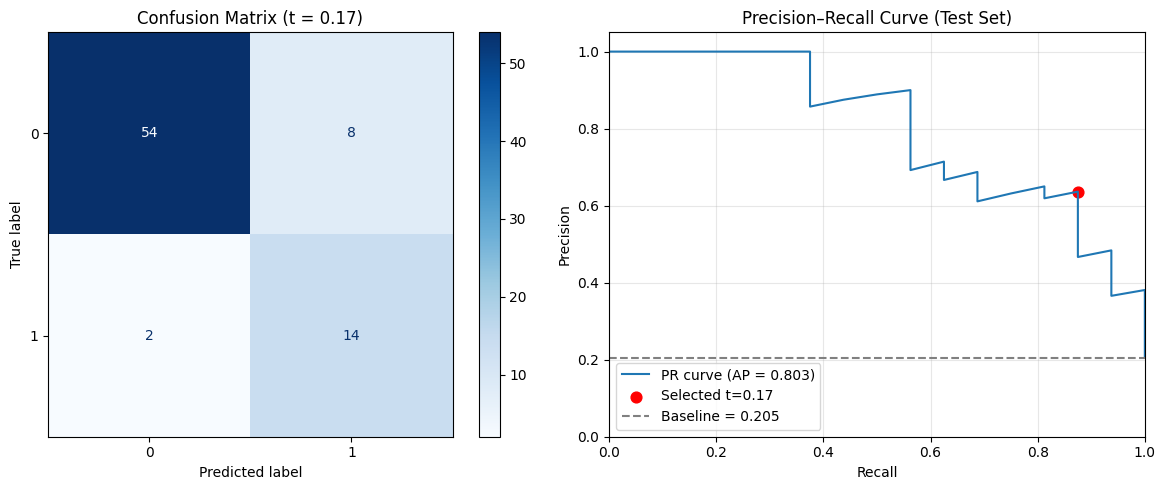

In [52]:
# Plots: Confusion Matrix + PR curve with selected point
cm = confusion_matrix(y_test_class, y_pred_thresh)
pr_precision, pr_recall, _ = precision_recall_curve(y_test_class, scores)
avg_prec = average_precision_score(y_test_class, scores)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Left: Confusion Matrix at tuned threshold
ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=axes[0], values_format='d', cmap='Blues')
axes[0].set_title(f'Confusion Matrix (t = {best_t:.2f})')

# Right: Precision–Recall curve with selected operating point
axes[1].plot(pr_recall, pr_precision, label=f'PR curve (AP = {avg_prec:.3f})')
axes[1].scatter(best_rec1, best_prec1, color='red', s=60, label=f'Selected t={best_t:.2f}')

pos_rate = np.mean(y_test_class)
axes[1].hlines(pos_rate, 0, 1, colors='gray', linestyles='--', label=f'Baseline = {pos_rate:.3f}')

axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')
axes[1].set_title('Precision–Recall Curve (Test Set)')
axes[1].legend(loc='lower left')
axes[1].grid(True, alpha=0.3)
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])

plt.tight_layout()
plt.show()

In [ ]:
#Final Observation:
    #Accuracy=87.2%, precision=63.6% and recal=87.5% the model are focused on detecting the diabets case
    #Accuracy precision score(AP)=0.80 which is a good indicator of the model's performance

### **Save the model**

In [37]:
import pickle

# Save the final trained classification model
with open("diabetes_model.pkl", "wb") as f:
    pickle.dump(model, f)

print("Model saved to diabetes_model.pkl")

Model saved to diabetes_model.pkl
